<a href="https://colab.research.google.com/github/Samrat-Doi/Samrat-Doi/blob/main/Payment_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/payment_fraud.csv')
df.shape

(39221, 6)

In [ ]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [ ]:
df.tail()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
39216,986,1,4.836982,creditcard,0.000000,0
39217,1647,1,4.876771,creditcard,377.930556,0
39218,1591,1,4.742303,creditcard,0.000000,0
39219,237,1,4.921318,creditcard,236.082639,0
39220,272,1,5.040929,paypal,0.000694,0


In [ ]:
df.label.value_counts()

0    38661
1      560
Name: label, dtype: int64

In [ ]:
df.paymentMethod.value_counts()

creditcard     28004
paypal          9303
storecredit     1914
Name: paymentMethod, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accountAgeDays,39221.0,857.563984,804.788212,1.000000,72.000000,603.000000,1804.000000,2000.000000
numItems,39221.0,1.084751,0.566899,1.000000,1.000000,1.000000,1.000000,29.000000
localTime,39221.0,4.748232,0.389360,0.421214,4.742303,4.886641,4.962055,5.040929
paymentMethodAgeDays,39221.0,122.641326,283.569177,0.000000,0.000000,0.012500,87.510417,1999.580556
label,39221.0,0.014278,0.118636,0.000000,0.000000,0.000000,0.000000,1.000000


# Data Visualization

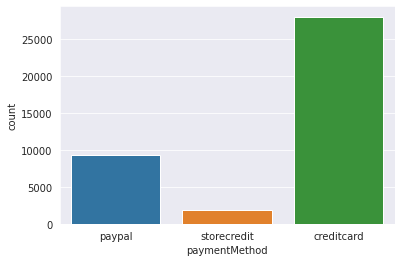

In [ ]:
sns.set_style('darkgrid')
sns.countplot(df['paymentMethod'])
plt.show()

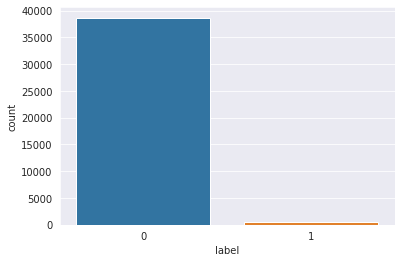

In [ ]:
sns.countplot(df['label'])
plt.show()

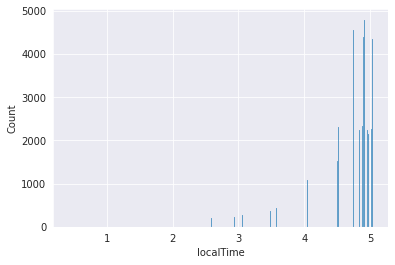

In [ ]:
sns.histplot(df['localTime'])
plt.show()

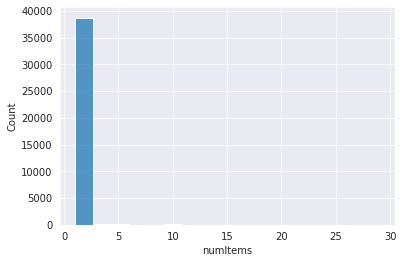

In [ ]:
sns.histplot(df['numItems'])
plt.show()

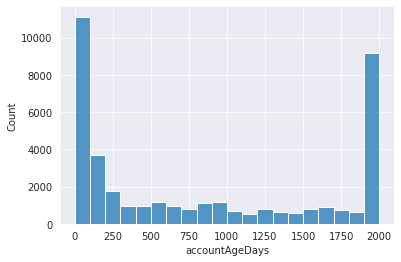

In [ ]:
sns.histplot(x = 'accountAgeDays', data=df)
plt.show()

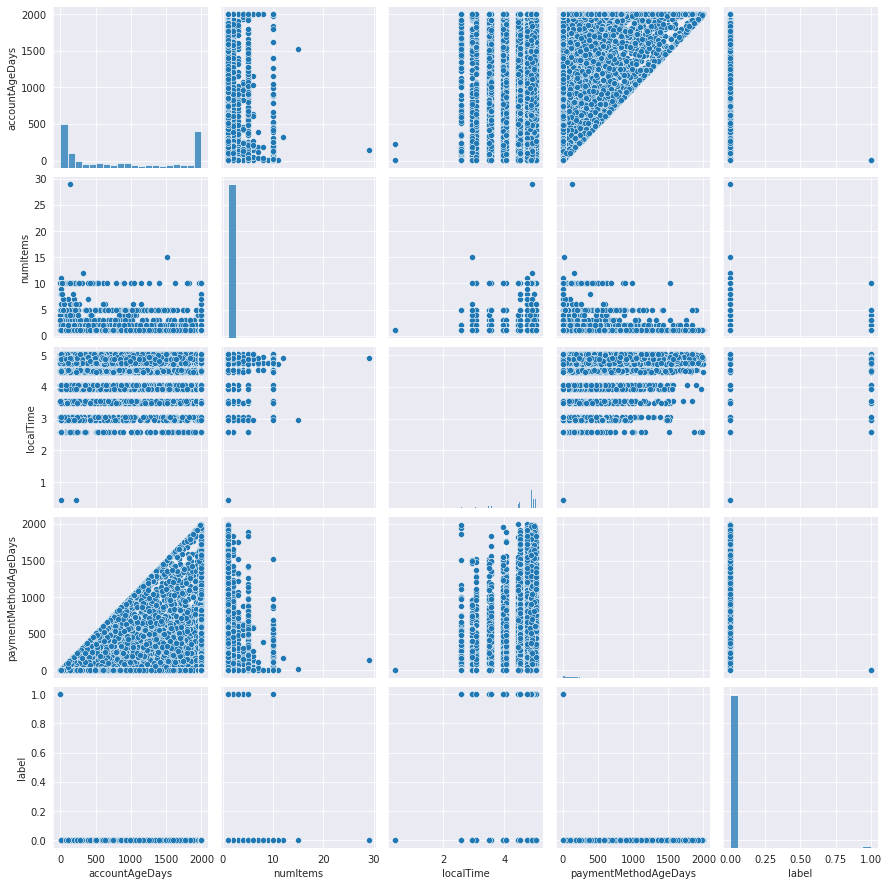

In [ ]:
sns.pairplot(df)
plt.show()

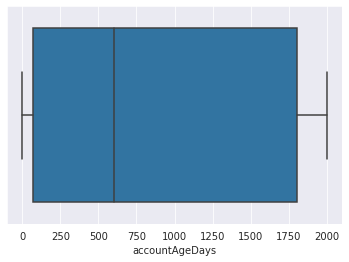

In [ ]:
sns.boxplot(df['accountAgeDays'])
plt.show()

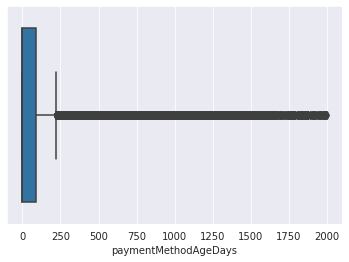

In [ ]:
sns.boxplot(df['paymentMethodAgeDays'])
plt.show()

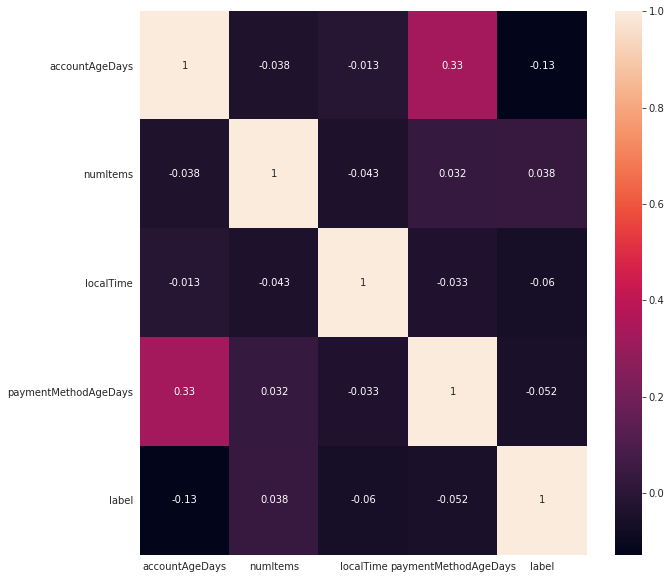

In [ ]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [ ]:
df_dum = pd.get_dummies(df['paymentMethod'])

In [ ]:
df = df.drop('paymentMethod', axis = 1)
df.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays',
       'label'],
      dtype='object')

In [ ]:
data = df_dum.join(df)
data.head()

,creditcard,paypal,storecredit,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
0,0,1,0,29,1,4.745402,28.204861,0
1,0,0,1,725,1,4.742303,0.000000,0
2,1,0,0,845,1,4.921318,0.000000,0
3,1,0,0,503,1,4.886641,0.000000,0
4,1,0,0,2000,1,5.040929,0.000000,0


In [ ]:
array = data.values
X = array[:,:-1]
y = array[:,-1]
scaler = StandardScaler().fit(X)
x = scaler.transform(X)
np.set_printoptions(precision=3)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state =1)

In [ ]:
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (29415, 7)
X_test shape:  (9806, 7)
y_train shape:  (29415,)
y_test shape:  (9806,)


In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

______________ Classification Report_________________
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9661
         1.0       0.00      0.00      0.00       145

    accuracy                           0.99      9806
   macro avg       0.49      0.50      0.50      9806
weighted avg       0.97      0.99      0.98      9806

         
______________ Accuracy score______________
0.9852131348154192
                         
_____________ Confusion Metrix_____________


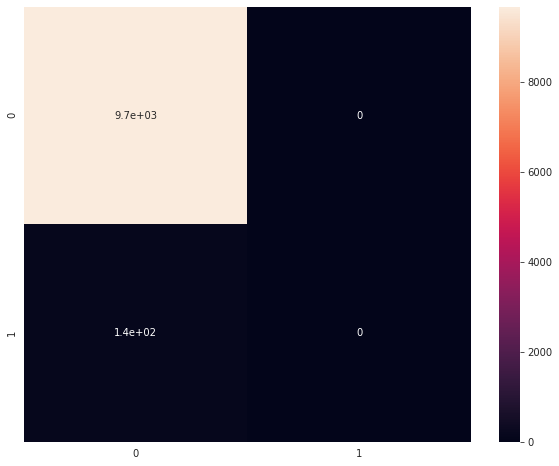

In [ ]:
print('______________ Classification Report_________________')
print(classification_report(y_test, predict))

print('         ')

print('______________ Accuracy score______________')
print(accuracy_score(y_test, predict))

print('                         ')
print('_____________ Confusion Metrix_____________')
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,predict), annot = True)